In [1]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd 

In [2]:
# importing dataset
data_set = pd.read_csv('User_Data.csv')

In [3]:
# Extracting Independent and dependent variable
x = data_set.iloc[:,[2,3]].values
y = data_set.iloc[:,4].values

In [4]:
# splitting the dataset into training and test test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [6]:
# feature Scaling 
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [7]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
# Fitting K-NN classifier to the training set 
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 5 , metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
# Predicting the test set result 
y_pred = classifier.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn

array([[64,  4],
       [ 3, 29]], dtype=int64)

K-NN Algorithm (Training set)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


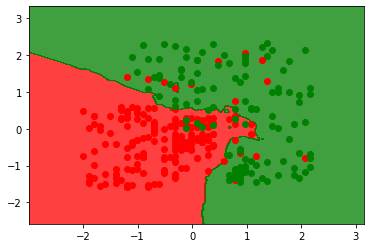

In [20]:
# visulaizing the training set result 
print("K-NN Algorithm (Training set)")
from matplotlib.colors import ListedColormap
x_set , y_set = x_train,y_train
x1,x2 = nm.meshgrid(nm.arange(start = x_set[:,0].min() -1,stop = x_set[:,0].max() + 1,step = 0.02),
nm.arange(start = x_set[:,1].min() - 1,stop = x_set[:,1].max() + 1,step = 0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75,cmap = ListedColormap(('red','green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)
    